# Exercise 1
Note: This exercise closely follows the post by Scott Fortmann-Roe about bias-variance tradeoff (see references below). It is recommended that you think about each of the questions before referring to that essay.

In this exercise you will get familiar with a **non-parapmetric** learning algorithm called k-Nearest Neighbours (kNN), and will implement it. You will then analyse the bias-variance tradeoff and try to come up with the optimal kNN classifier for the given data.

For this exercise we will use hypothetical and artificial generated data.


## Implement k-Nearest Neighbours (kNN)

The kNN algorithm is simple - given a labeled sample set data, and a new sample, predict the label of this sample by using majority vote (or averaging) over the labels of the k-nearest neighbour of the new data in the sample set.

For this task, assume each data point is an n-dimensional point in $\mathbb{R}^n$, and each label is either 0 or 1.

Implement a class called KNNClassifier and two methods:
- `fit`: should recieve the training data (an array of shape [n_samples, n_features]) and their labels (array of shape [n_samples]). 
- `predict`: should recieve a set of data (an array of shape [n_samples, n_features]) and **return** their predicted labels (array of shape [n_samples]).

Use simple Euclidean distance to measure the distance between two points. In case two points in the training have the same distance from a given point to predict, the nearest would be the one appearing first in the training set. 

Use majority vote between all kNN of a point to predict its label. In case the vote of all kNN is tied, you may predict whichever label you wish.

You may look up [sklearn.neighbors.KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for reference.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd


In [2]:
from scipy.spatial import distance
import pandas as pd

class kNNClassifier:
    import pandas as pd
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors
        #self.trainingX = 0
       

    def fit(self, X, y):
        self.trainingX = pd.DataFrame(X)
        self.trainingy = y
        

    def predict(self, x):
        prediction_list = []
        for datum in x:
            
            diff = []
            index = 0
            for index, row in self.trainingX.iterrows():
                
                diff.append(distance.euclidean(row, datum)) 
                
         
            distance_matrix = pd.concat([pd.Series(diff), pd.Series(self.trainingy)], axis=1)
            distance_matrix = distance_matrix.sort_values([0])
        
            votes = 0
            for i in range(self.n_neighbors):
                votes += distance_matrix.iloc[i,1]
            if votes > 0:
                prediction_list.append(1)
            else:
                prediction_list.append(-1)
       
        return pd.Series(prediction_list)
            


## Learn and evaluate kNN algorithm on artificial data
kNN is a **non-parametric** in the sense that no inner parameter of the model is learned by the sample training set (or maybe you could say that the number of parameters increases with the size of the sample set). However, the number of neighbours **k is considered a hyper-parameter**, and choosing the optimal value for it, is choosing the balance between bias and variance as discussed in class.




### An applied example: voter party registration

In this example, each voter is described by a vector of two features $(x_0, x_1)$, where $x_0$ describes how wealthy that voter is, and $x_1$ describes how religious the voter is. Label $y=1$ represents a Republican voter, and $y=-1$ represents a Democrat voter.

Use the given function `generate_data(m)` to create m samples with m labels. The labels are created using the following function:

$$
y = \text{sign}\left(x_1 - 0.1\times((x_0-5)^3-x_0^2+(x_0 − 6)^2+80)\right)
$$

and then a small fraction of the labels (chosen randomly, up to 10%) are flipped to represent unknown effect of features which are not measured. The sign of 0 is defined as 1 for this case.


Below is an example of generating 500 samples, and plotting them.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def true_boundary_voting_pred(wealth, religiousness):
  return religiousness-0.1*((wealth-5)**3-wealth**2+(wealth-6)**2+80)

def generate_data(m, seed=None):
  # if seed is not None, this function will always generate the same data
  np.random.seed(seed) 
  
  X = np.random.uniform(low=0.0, high=10.0, size=(m,2))
  y = np.sign(true_boundary_voting_pred(X[:,0], X[:,1]))
  y[y==0] = 1
  samples_to_flip = np.random.randint(0,m//10)
  flip_ind = np.random.choice(m, samples_to_flip, replace=False)
  y[flip_ind] = -y[flip_ind]
  return X, y

def plot_labeled_data(X, y, no_titles=False):
  republicans = (y==1)
  democrats = (y==-1)
  plt.scatter(X[republicans,0], X[republicans,1], c='r')
  plt.scatter(X[democrats,0], X[democrats,1], c='b')
  if not no_titles:
    plt.xlabel('Wealth')
    plt.ylabel('Religiousness')
    plt.title('Red circles represent Republicans, Blues Democrats')
    
  plt.xlim([0, 10]);
  plt.ylim([0, 10]);
  plt.plot(np.linspace(0,10,1000), -true_boundary_voting_pred(np.linspace(0,10,1000), np.zeros(1000)), linewidth=2, c='k');

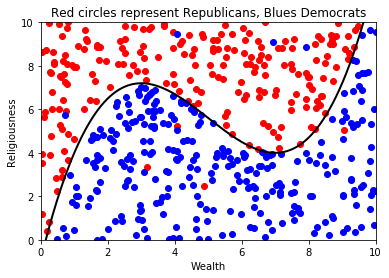

In [4]:
# Play this several times to see different sampling sets
X, y = generate_data(m=500)
plot_labeled_data(X, y)


### 1. Analyse the properties of kNN
Generate multiple sample data sets of size 500 (use the given function above), and plot the decision plane for increasing values of k (e.g.: 1, 3, 5, 11, 21, 51, 99).

The decision plane should cover the range [0,10] for both axes, coloring the patches that would be classified as Republicans or Democrats in two colors. It should look something like [that](https://drive.google.com/open?id=1jMD7I9sWT4w4O48pjwSPCFL1NLLPo10j).

Answer the following questions:
- How is the decision plain affected from changes in the sample set, as a function of k?
- Can you describe when do you underfit or overfit the data? 
- How does the complexity of this model depends on k?


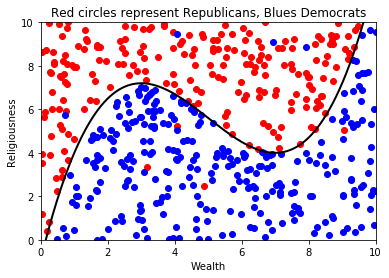

In [5]:
# code goes here
knn = kNNClassifier(1)    
knn.fit(X,y)
result = knn.predict(X)
plot_labeled_data(X, result)

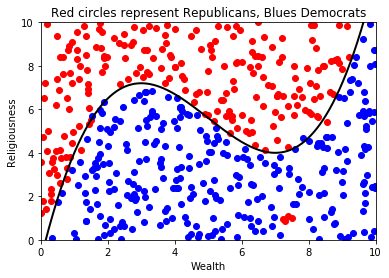

In [6]:
knn = kNNClassifier(3)  
X, y = generate_data(m=500)
knn.fit(X,y)
result = knn.predict(X)
plot_labeled_data(X, result)

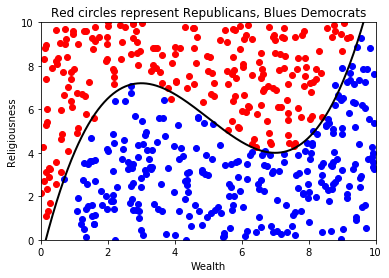

In [7]:
knn = kNNClassifier(5)   
X, y = generate_data(m=500)
knn.fit(X,y)
result = knn.predict(X)
plot_labeled_data(X, result)

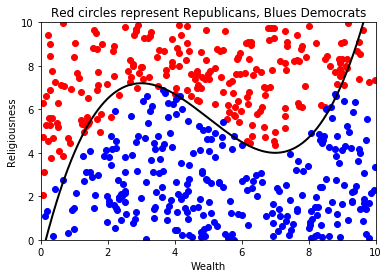

In [8]:
knn = kNNClassifier(11)  
X, y = generate_data(m=500)
knn.fit(X,y)
result = knn.predict(X)
plot_labeled_data(X, result)

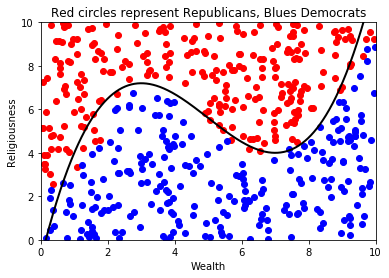

In [9]:
knn = kNNClassifier(21)    
X, y = generate_data(m=500)
knn.fit(X,y)
result = knn.predict(X)
plot_labeled_data(X, result)

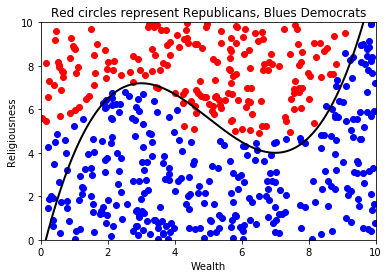

In [10]:
knn = kNNClassifier(51)    
X, y = generate_data(m=500)
knn.fit(X,y)
result = knn.predict(X)
plot_labeled_data(X, result)

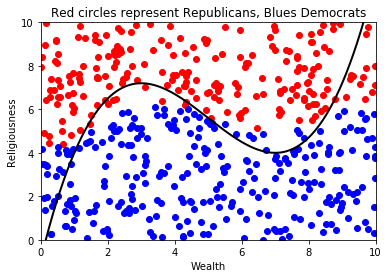

In [11]:
knn = kNNClassifier(99)   
X, y = generate_data(m=500)
knn.fit(X,y)
result = knn.predict(X)
plot_labeled_data(X, result)

### 2. Finding the optimal k
Sample a single sample set of size 1000 and divide it randomly to train (0.6) / validation (0.2) / test (0.2) sets. Plot the train vs validation error for several k values, and choose the best k. Where do you underfit/overfit the data? Finally, estimate the generalization error of your chosen classifier using the test set.


In [12]:
# code goes here
X, y = generate_data(m=1000)
from sklearn.model_selection import train_test_split
X_train, X_test_validate, y_train, y_test_validate = train_test_split(X, y, test_size = 0.4, random_state = 42)
X_test, X_validate, y_test, y_validate = train_test_split(X_test_validate, y_test_validate, test_size = 0.5, random_state = 42)

In [13]:
error_dict = {}
for k in range(51):
    if k %2 > 0:
        knn = kNNClassifier(k)
        knn.fit(X_train, y_train)
        error = sum(abs(knn.predict(X_validate)-y_validate))/len(y_validate)
        error_dict[k] = error
        

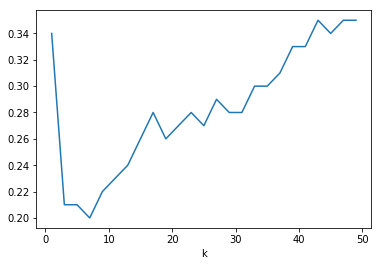

In [14]:
plt.figure()

plt.plot(error_dict.keys(), error_dict.values()) 
plt.xlabel("k")

plt.show()

k = 7 and k = 9 gave the smallest error, each missing on only 19% of points.<br>
For k > 10 we have overfitting, for k < 6 we have underfitting

In [15]:
k = 7
knn = kNNClassifier(k)
knn.fit(X_train, y_train)
error = sum(abs(knn.predict(X_test)-y_test))/len(y_test)
print(f"Generalization error was {error}")

Generalization error was 0.27


### 3. Using cross validation
This time, put the test data aside (0.2 of the data), and apply 5-fold CV on the remaining data to evaluate the performance of each k value. 
What is the size of the validation and train set now, in each CV iteration?
Did your final model selection change? Explain why.

In [16]:
# code goes here
X, y = generate_data(m=1000)
X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
def return_sliced(x, index, n):
    return np.delete(x, slice(index*n, (index+1)*n), axis=0)

In [ ]:
#print(len(X_train_validate))
#print("***")
n = int(len(y_train_validate)/5)
error = {}
for k in range(52):
    if k%2>0:
        knn=kNNClassifier(k)
        error[k] = 0
        for index in range(5):
            X_train = return_sliced(X_train_validate, index, n)
            #print(len(X_train))
            y_train = return_sliced(y_train_validate, index, n)
            X_validate = X_train_validate[index*n:(index+1)*n,]
            y_validate = y_train_validate[index*n:(index+1)*n,]
            knn.fit(X_train, y_train)
            #print(len(X_validate))
            #print(len(y_validate))
            #print(n)
            #t = sum(abs(knn.predict(X_validate)-y_validate))/len(y_validate)
            error[k] += sum(abs(knn.predict(X_validate)-y_validate))/len(y_validate)
        error[k] /= 5
        
plt.figure()

plt.plot(error.keys(), error.values()) 
plt.show()
            
            

Apparently we underfit below 10 anad overfit above 30

In [ ]:
minimal_k = [1, error[1]]
for key in error.keys():
    if error[key] < minimal_k[1]:
        minimal_k = [key, error[key]]
print(f"the {minimal_k[0]} neighbors seems to be optimal")

## so we'll go for k=13

In [ ]:
knn = kNNClassifier(13)
knn.fit(X_train_validate, y_train_validate)
result = knn.predict(X_test)
error = sum(abs(result - y_test))/len(y_test)


In [ ]:
print(f"generalization error for our best k (13) is {error}")

## References
- http://scott.fortmann-roe.com/docs/BiasVariance.html
- http://scott.fortmann-roe.com/docs/MeasuringError.html
- http://scikit-learn.org/stable/modules/cross_validation.html